In [1]:
# Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# Importing self-made functions
from NVAR1 import *
from NVAR_objective import *

In [2]:
# Setting up signals for training w/ cross-validation. Signal processing has been completed prior to this point. 
signal_idx = [17, 21, 22, 24, 25]
parent_dict = os.path.dirname(os.getcwd())
signal_dict = os.path.join(parent_dict, "data", "Normalised_Signals")

signals = []

for i in signal_idx:
    data_file = os.path.join(signal_dict, f"M_NProtocol_{i}")
    signal = pd.read_csv(data_file, header=0, delimiter=',', dtype='float').values
    signals.append(signal)

In [3]:
# TODO: Update parameter search to extend range and increase resolution of observation window. 
# Defining parameter space.
parameter_space1 = {
    "s": hp.randint('s', 1, 10),  # Assuming s should be an integer between 1 and 10
    "k": hp.randint('k', 1, 10),  # Assuming k should be an integer between 1 and 10
    "r": hp.loguniform('r', np.log(1e-6), np.log(1e-1)),  # Adjust the range based on your requirements
    "p": 2,  # Assuming p is a constant with a specified value of 2
    "signals": signals,
    "train": 5000,
    "test": 50000,
    "dt": 1   
}

parameter_space2 = {
    "s": 7,
    "k": 2,
    "r": 0.001,
    "p": 2,
    "signals": signals,
    "train": hp.randint("train", 5000, 50000),
    "test": 30000,
    "dt": 1   
}

In [4]:
# Initialize trials object to retain information about experiments:
trials = Trials()

# Begin hyperparameter tuning:
best = fmin(
    fn=objective,
    space=parameter_space2,
    algo=tpe.suggest,
    max_evals=300,
    trials=trials
)

print(f"Best: {best}")

100%|██████████| 300/300 [44:11<00:00,  8.84s/trial, best loss: 0.00038269359293176687]
Best: {'train': 26344}


In [5]:
trials.results

[{'loss': 0.0005073890937822395,
  'status': 'ok',
  'mae': 0.00015138332705041518,
  'r2': 0.9999966779074981,
  'time': 2.1779455613997927,
  'delay': 7,
  'stride': 2,
  'ridge': 0.001,
  'train': 23081},
 {'loss': 0.003335418957077784,
  'status': 'ok',
  'mae': 0.00018702095231357707,
  'r2': 0.9998385943576681,
  'time': 1.9006046821998097,
  'delay': 7,
  'stride': 2,
  'ridge': 0.001,
  'train': 39800},
 {'loss': 0.0029196419437490153,
  'status': 'ok',
  'mae': 0.00022019542775498813,
  'r2': 0.9999114298326861,
  'time': 1.1187558363999415,
  'delay': 7,
  'stride': 2,
  'ridge': 0.001,
  'train': 12066},
 {'loss': 0.002267370278337223,
  'status': 'ok',
  'mae': 0.0001750965275839435,
  'r2': 0.999928296123473,
  'time': 1.546722373800185,
  'delay': 7,
  'stride': 2,
  'ridge': 0.001,
  'train': 27347},
 {'loss': 0.003306652794737107,
  'status': 'ok',
  'mae': 0.00019013014311369106,
  'r2': 0.999854873509937,
  'time': 1.9981020446000912,
  'delay': 7,
  'stride': 2,
  'r

In [6]:
df = pd.DataFrame(trials.results)

In [7]:
df.head()

,loss,status,mae,r2,time,delay,stride,ridge,train
0,0.000507,ok,0.000151,0.999997,2.177946,7,2,0.001,23081
1,0.003335,ok,0.000187,0.999839,1.900605,7,2,0.001,39800
2,0.002920,ok,0.000220,0.999911,1.118756,7,2,0.001,12066
3,0.002267,ok,0.000175,0.999928,1.546722,7,2,0.001,27347
4,0.003307,ok,0.000190,0.999855,1.998102,7,2,0.001,28899


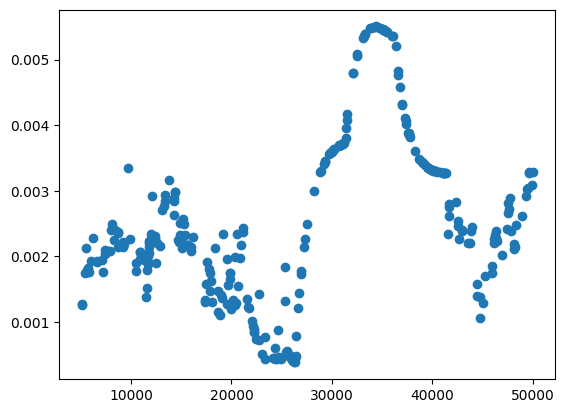

In [9]:
plt.Figure(figsize=(10,4))
plt.scatter(df["train"], df["loss"], marker='o')

In [10]:
loss_min_idx = df['loss'].idxmin()

min_loss_ridge = df.loc[loss_min_idx, 'train']

In [11]:
min_loss_ridge

26344

In [12]:
result_name = "training_size_test.csv"
results_dict = os.path.join(os.getcwd(), "results", "NVAR_tuning_results", result_name)
print(results_dict)

/home/dafydd/PycharmProjects/Simulating-Neuronic-Oscillations-with-Reservoir-Computing/init_NGRC/results/NVAR_tuning_results/training_size_test.csv


In [13]:
df.to_csv(results_dict, sep=",", index=False)